# Convergenc Rate Analysis Perdictor-Corrector Scheme:

In [1]:
from lxml import etree
import itertools
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

### Read result of different dx 

In [18]:
particles005 = pd.HDFStore('005.h5',mode='r')
keylist005 = particles005.keys()

particles1 = pd.HDFStore('01.h5',mode='r')
keylist1 = particles1.keys()

particles15 = pd.HDFStore('015.h5',mode='r')
keylist15 = particles15.keys()

particles2 = pd.HDFStore('02.h5',mode='r')
keylist2 = particles2.keys()

particles25 = pd.HDFStore('025.h5',mode='r')
keylist25 = particles25.keys()

particles3= pd.HDFStore('03.h5',mode='r')
keylist3 = particles3.keys()

particles35 = pd.HDFStore('035.h5',mode='r')
keylist35 = particles35.keys()

particles4 = pd.HDFStore('04.h5',mode='r')
keylist4 = particles4.keys()

particles45 = pd.HDFStore('045.h5',mode='r')
keylist45 = particles45.keys()

particles5 = pd.HDFStore('05.h5',mode='r')
keylist5 = particles5.keys()

## Find peak position of different dx

In [51]:
a='/s00015'
df005= particles005.get(a)

df1= particles1.get(a)

df15= particles15.get(a)

df2= particles2.get(a)

df25= particles25.get(a)

df3= particles3.get(a)

df35= particles35.get(a)

df4= particles4.get(a)

df45= particles45.get(a)

df5= particles5.get(a)

In [52]:
index005 = df005.y.loc[df005.types==0].idxmax()
index1 = df1.y.loc[df1.types==0].idxmax()
index15 = df15.y.loc[df15.types==0].idxmax()
index2 = df2.y.loc[df2.types==0].idxmax()
index25 = df25.y.loc[df25.types==0].idxmax()
index3 = df3.y.loc[df3.types==0].idxmax()
index35 = df35.y.loc[df35.types==0].idxmax()
index4 = df4.y.loc[df4.types==0].idxmax()
index45 = df45.y.loc[df45.types==0].idxmax()
index5 = df5.y.loc[df5.types==0].idxmax()

In [53]:
dx = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

error = []

#choose the peak position when dx= 0.05 as the standard
x = df005.x.iloc[index005]
y = df005.y.iloc[index005]

#caculate the distance between the standard and other peak position of other dx
x1 = df1.x.iloc[index1]
y1 = df1.y.iloc[index1]
error1 = ((x1-x)**2+(y1-y)**2)**0.5
error.append(error1)

x15 = df15.x.iloc[index15]
y15 = df15.y.iloc[index15]
error15 = ((x15-x)**2+(y15-y)**2)**0.5
error.append(error15)

x2 = df2.x.iloc[index2]
y2 = df2.y.iloc[index2]
error2 = ((x2-x)**2+(y2-y)**2)**0.5
error.append(error2)

x25 = df25.x.iloc[index25]
y25 = df25.y.iloc[index25]
error25 = ((x25-x)**2+(y25-y)**2)**0.5
error.append(error25)

x3 = df3.x.iloc[index3]
y3 = df3.y.iloc[index3]
error3 = ((x3-x)**2+(y3-y)**2)**0.5
error.append(error3)

x35 = df35.x.iloc[index35]
y35 = df35.y.iloc[index35]
error35 = ((x35-x)*(x35-x)+(y35-y)*(y35-y))**0.5
error.append(error35)

x4 = df4.x.iloc[index4]
y4 = df4.y.iloc[index4]
error4 = ((x4-x)**2+(y4-y)**2)**0.5
error.append(error4)

x45 = df45.x.iloc[index45]
y45 = df45.y.iloc[index45]
error45 = ((x45-x)**2+(y45-y)**2)**0.5
error.append(error45)


x5 = df5.x.iloc[index5]
y5 = df5.y.iloc[index5]
error5 = ((x5-x)**2+(y5-y)**2)**0.5
error.append(error5)

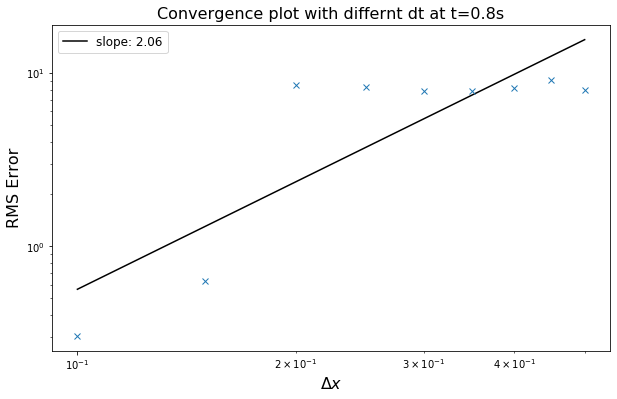

In [54]:
#convergence plot according to dt with different dx
fig, axs = plt.subplots(1, 1, figsize=(10,6))
line_fit = np.polyfit(np.log(dx), np.log(error), 1)
axs.loglog(dx, np.exp(line_fit[1]) * dx**(line_fit[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit[0]))
axs.loglog(dx, error,'x')

axs.set_xlabel('$\Delta x$', fontsize=16)
axs.set_ylabel('RMS Error', fontsize=16)
axs.set_title('Convergence plot with differnt dt at t=0.8s', fontsize=16)
axs.legend(fontsize=12)

In [15]:
particles005.close()
particles1.close()
particles15.close()
particles2.close()
particles25.close()
particles3.close()
particles35.close()
particles4.close()
particles45.close()
particles5.close()